<a href="https://colab.research.google.com/github/krittikaroy0/CSE407/blob/main/alex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

In [ ]:
device_list = tf.test.gpu_device_name()

In [ ]:
device_list

'/device:GPU:0'

In [ ]:
if device_list  != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at:()'.format(device_list))

Found GPU at:()


In [ ]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
import os
import cv2
from glob import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation,GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [ ]:
input_folder  = "/content/drive/MyDrive/CSE407/Detect_solar_dust"
output_folder = "/content/drive/MyDrive/CSE407/Splitted_Output/"
splitfolders.ratio(input_folder,output_folder,seed=42,ratio=(.7,.3))

Copying files: 2562 files [12:08,  3.52 files/s]


In [ ]:
train_path = '/content/drive/MyDrive/CSE407/Splitted_Output/train/'

In [ ]:
#Setting Test dir paths        
val_path = '/content/drive/MyDrive/CSE407/Splitted_Output/val/'

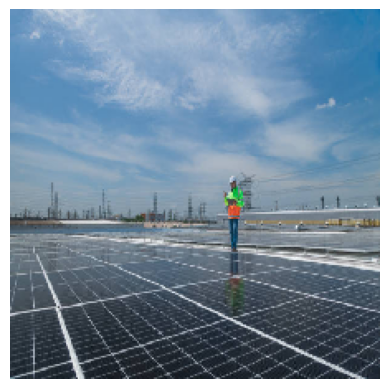

In [ ]:
#Displaying the image
img = load_img(train_path + "Dusty/Imgdirty_1000_1.jpg", target_size=(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

(224, 224, 3)


In [ ]:
folders=glob(r"/content/drive/MyDrive/CSE407/Detect_solar_dust/*")
print(len(folders))

2


In [ ]:
image_count = []
class_names = []
print('{:18s}'.format('class'), end='')
print('Count:')
print('-' * 24)
#Reading the image from each folder from training path
for folder in os.listdir(train_path):
    folder_num = len(os.listdir(os.path.join(train_path,folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)
print('-' * 24)    
print("Number of classes : ",len(class_names))

class             Count:
------------------------
Clean                1045
Dusty                748
------------------------
Number of classes :  2


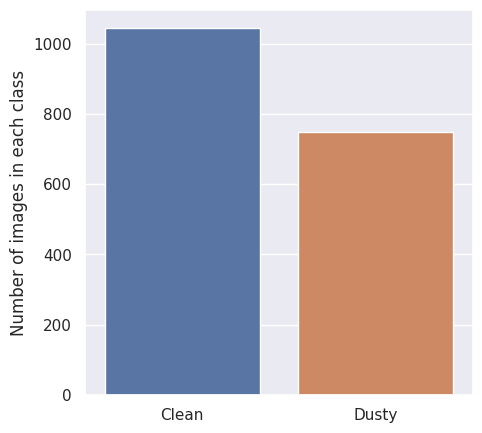

In [ ]:
#Plotting the count of images for each class
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x=class_names, y=image_count)
plt.ylabel('Number of images in each class')
plt.show()

In [ ]:
#Finding number of classes
className = glob(train_path + '/*')
num_classes = len(className)
print(num_classes)

2


In [ ]:
#Using Alexnet architecture. input is 224, 224,3 image and output is 2 classes of solar  
model = tf.keras.models.Sequential([
    #1st Convolutional Layer
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #2nd Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #3rd Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    #4th Convolutional Layer
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #5th Convolutional Layer
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    #Passing it to a Fully Connected layer
    tf.keras.layers.Flatten(),
    # 1st Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),# Add Dropout to prevent overfitting
    # 2nd Fully Connected Layer
    tf.keras.layers.Dense(4096, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    # 3rd Fully Connected Layer
    tf.keras.layers.Dense(1000, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    #Output Layer
    tf.keras.layers.Dense(2, activation='softmax'),
    #tf.keras.layers.BatchNormalization()
])


In [ ]:
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

In [ ]:
#Getting model's summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_12 (Bat  (None, 54, 54, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_13 (Bat  (None, 26, 26, 256)      1024      
 chNormalization)                                                
                                                      

In [ ]:
#Specifing epochs & batch size
epochs = 10
batch_size = 64
image_height = 224
image_width = 224

In [ ]:
#Creating an object of ImageDataGenerator for augmenting training dataset
train_datagen = ImageDataGenerator(rescale= 1./255,
rotation_range=10,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.1,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest')

#Creating an object of ImageDataGenerator for augmenting test dataset
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
#Generating batches of Augmented data of image size 224, 224 and batch size of 32
train_generator = train_datagen.flow_from_directory(
directory = train_path, 
target_size= (image_height, image_width), # resize to this size
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical"
)

test_generator = test_datagen.flow_from_directory(
directory = val_path,
target_size=(image_height, image_width),
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

nb_train_samples = train_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())

Found 1793 images belonging to 2 classes.
Found 769 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ReduceLROnPlateau
#Callback to save the best model. Using checkpoint and earlystopping to monitor validation accuracy
callbacks_list = [
    tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=10, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='fruit_model.h5',
        monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10,verbose=1)
]

In [ ]:
#Fitting the model
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=test_generator,
        verbose = 1,
        validation_steps=nb_test_samples // batch_size)

Epoch 1/10
28/28 [==============================] - ETA: 0s - loss: 1.1940 - accuracy: 0.4361
Epoch 1: val_accuracy improved from -inf to 0.41797, saving model to fruit_model.h5
28/28 [==============================] - 137s 5s/step - loss: 1.1940 - accuracy: 0.4361 - val_loss: 0.7007 - val_accuracy: 0.4180 - lr: 1.0000e-05
Epoch 2/10
28/28 [==============================] - ETA: 0s - loss: 1.1244 - accuracy: 0.4436
Epoch 2: val_accuracy did not improve from 0.41797
28/28 [==============================] - 123s 4s/step - loss: 1.1244 - accuracy: 0.4436 - val_loss: 0.7027 - val_accuracy: 0.4180 - lr: 1.0000e-05
Epoch 3/10
28/28 [==============================] - ETA: 0s - loss: 1.0508 - accuracy: 0.4581
Epoch 3: val_accuracy improved from 0.41797 to 0.41927, saving model to fruit_model.h5
28/28 [==============================] - 126s 5s/step - loss: 1.0508 - accuracy: 0.4581 - val_loss: 0.6999 - val_accuracy: 0.4193 - lr: 1.0000e-05
Epoch 4/10
28/28 [==============================] - ETA

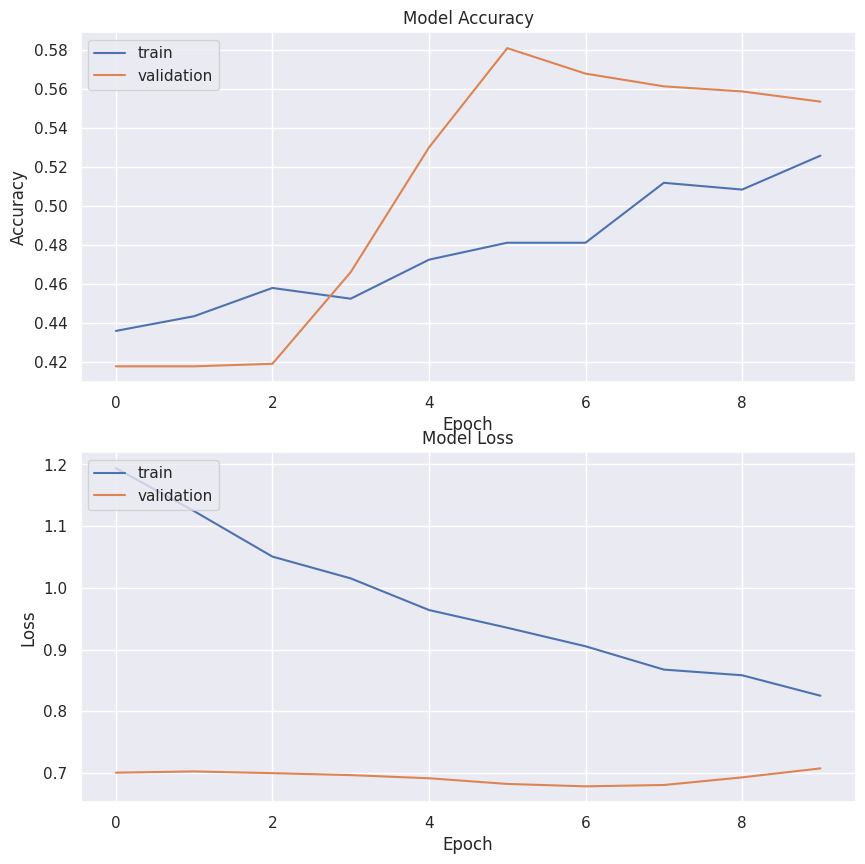

In [ ]:
#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [ ]:
# model evaluation
score = model.evaluate(test_generator)
print('test loss:', score[0])
print('test accuracy:', score[1])

13/13 [==============================] - 30s 2s/step - loss: 0.7071 - accuracy: 0.5540
test loss: 0.7070958614349365
test accuracy: 0.5539661645889282


In [ ]:
# save the whole model
model.save("./fruit_model.h5")

In [ ]:
# make a prediction for a new image.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

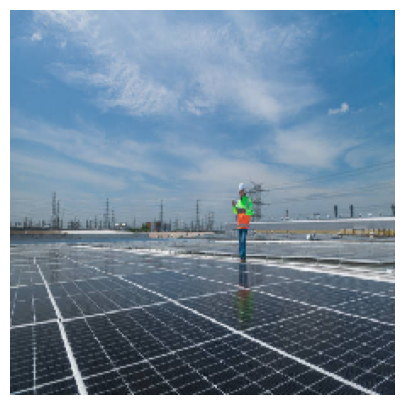

In [ ]:
sample_path='/content/drive/MyDrive/CSE407/Splitted_Output/train/'
img = load_img(sample_path + "Dusty/Imgdirty_1000_1.jpg", target_size=(227,227))
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
def load_image(filename):
    #load the image
    img = load_img(filename, grayscale=False, color_mode="rgb", target_size=(224, 224, 3))
    #convert to array
    img = img_to_array(img)
    #reshape into a single sample with 1 channel
    img = img.reshape(1, 224, 224, 3)
    #prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [ ]:
img = load_image(sample_path + "Dusty/Imgdirty_1000_1.jpg")
model = load_model('fruit_model.h5')

In [ ]:
# predict the class
predict_x=model.predict(img)
result=np.argmax(predict_x,axis=1)
if result[0] == 0:
    print("Dusty")
elif result[0] == 1:
    print("Clean")
else:
    print("Not in the list")

1/1 [==============================] - 0s 32ms/step
Dusty
